/Users/max/Documents/PeakAI/rl4sc/vecenvs.py:361: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


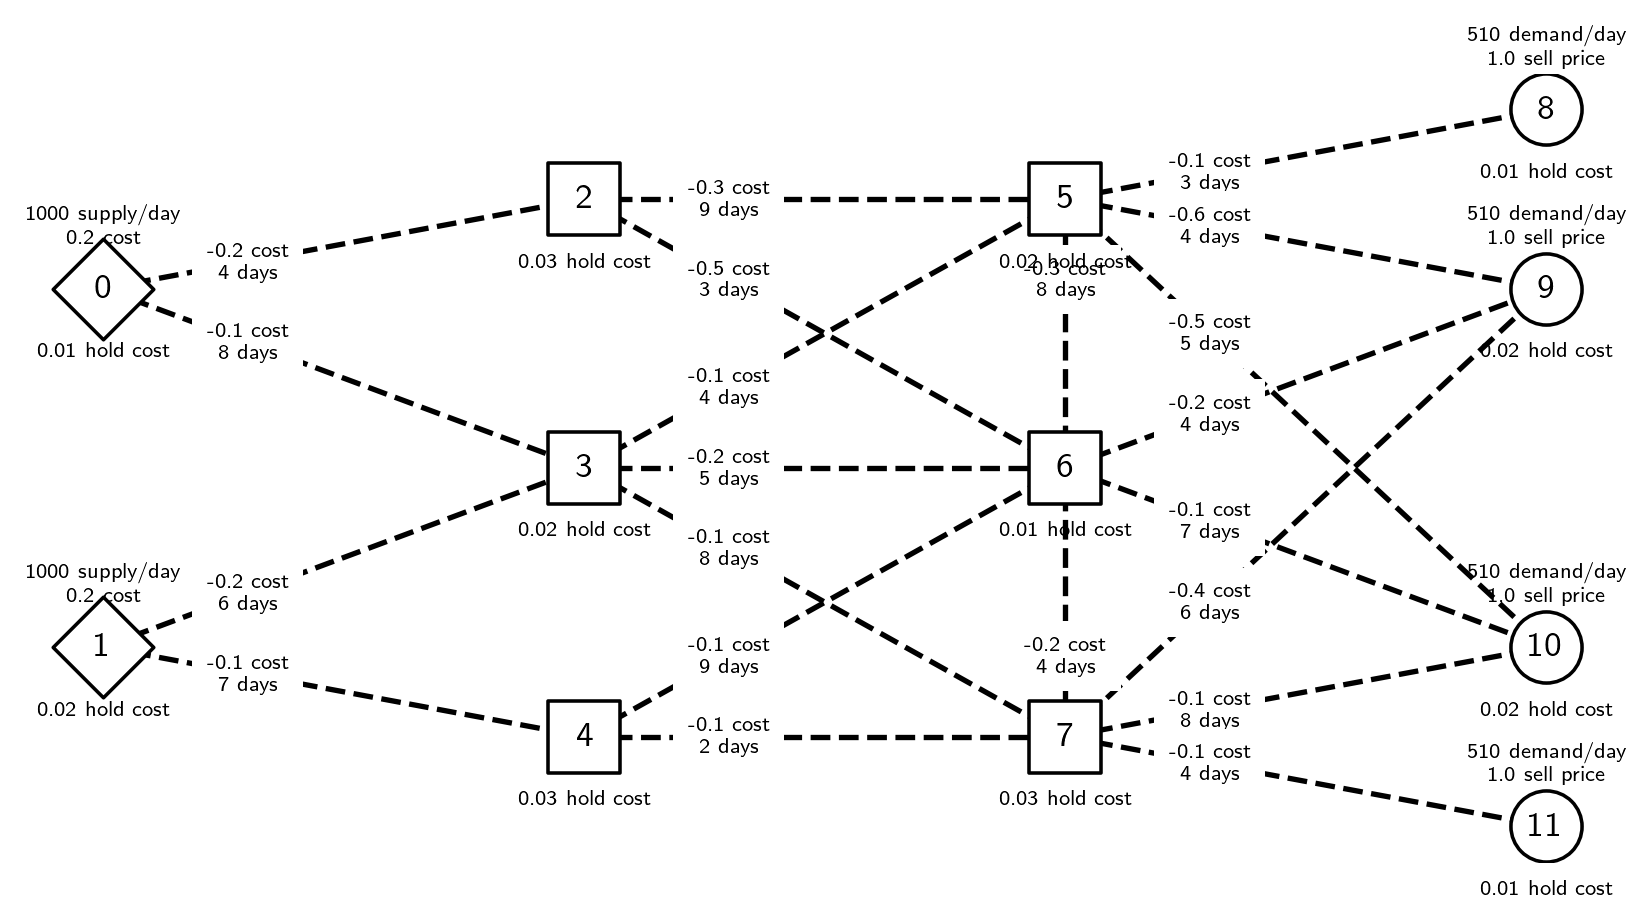

In [339]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pandas as pd
import vecenvs

from stable_baselines3 import A2C, PPO
from matplotlib import cm

importlib.reload(vecenvs)

plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True
plt.rcParams['animation.ffmpeg_path'] = '/Applications/ffmpeg'

np.random.seed(0)

setup_name = 'complex'

node_df = pd.read_csv(f'supplychains/{setup_name}/nodes.csv')
edge_df = pd.read_csv(f'supplychains/{setup_name}/edges.csv')

max_time = 25000

supply_nodes = np.array([0, 1])
supply_amounts = np.random.poisson(1000, size=(len(supply_nodes), max_time))
supply_prices = 0.2 * np.ones(shape=(len(supply_nodes), max_time))

demand_nodes = np.array([8, 9, 10, 11])
demand_prices = 1.0 * np.ones(shape=(len(demand_nodes), max_time))
demand_means = 1000 * np.sin(np.pi * np.arange(max_time)/ 100)**2 + 10
demand_amounts = np.random.poisson(demand_means, size=(len(demand_nodes), max_time))


supplies = (supply_nodes, supply_amounts, supply_prices)
demands = (demand_nodes, demand_amounts, demand_prices)

num_envs = 1

env = vecenvs.VectorisedSupplyChain(node_df, edge_df, supplies, demands, max_time, num_envs, 
                                    update_interval=1000, demand_window_size=200)

env.plot_chain()

In [340]:
model = PPO('MlpPolicy', env, verbose=0, batch_size=100, n_steps=1000)
model.learn(total_timesteps=max_time * num_envs)    

1000: 11.45
2000: 13.25
3000: 13.62
4000: 13.79
5000: 14.17
6000: 14.16
7000: 14.18
8000: 14.33
9000: 14.48
10000: 14.60
11000: 14.68
12000: 14.73
13000: 14.82
14000: 14.93
15000: 14.95
16000: 14.93
17000: 14.98
18000: 15.01
19000: 15.02
20000: 15.05
21000: 15.09
22000: 15.09
23000: 15.11
24000: 15.10
25000: 15.13


/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_16363/2715639394.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


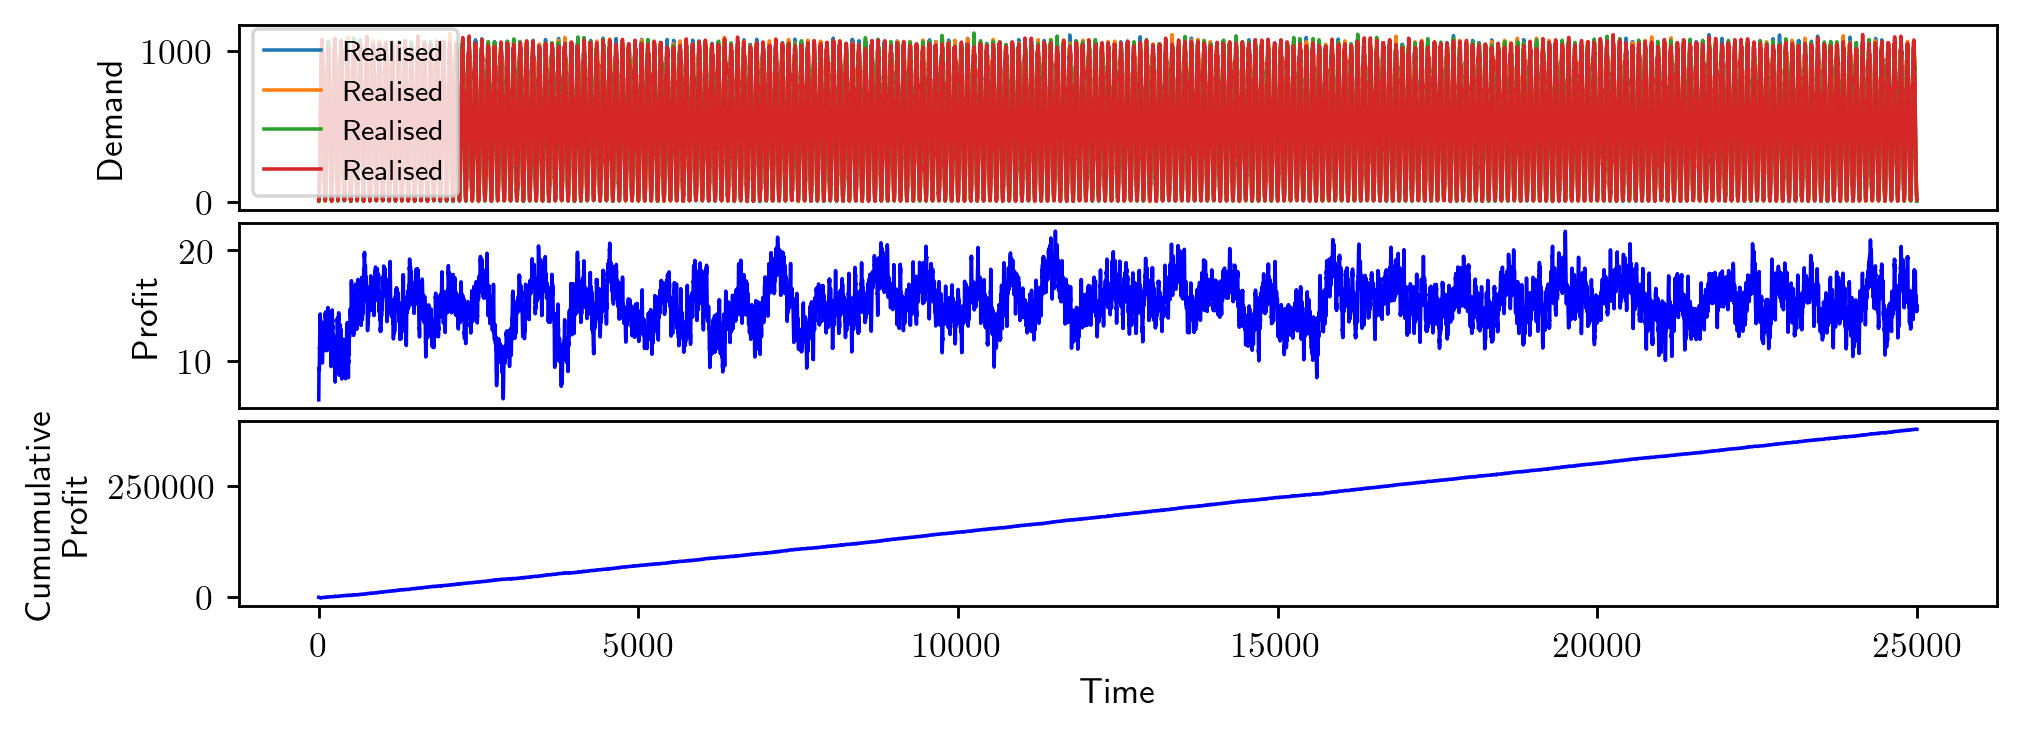

In [341]:
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(8, 3)

def smooth(x, window_size=250):
    return np.convolve(x, np.ones(window_size)/window_size, mode='valid')

for k in range(len(demand_nodes)):
    ax[0].plot(demand_amounts[k], linewidth=1.0, label='Realised')

ax[1].plot(smooth(np.mean(np.sum(env.batch_node_profit_history, axis=-1), axis=0)), color='blue', linewidth=1.0)
ax[2].plot(np.cumsum(np.mean(np.sum(env.batch_node_profit_history, axis=-1), axis=0)), color='blue', linewidth=1.0)

ax[0].set_xticks([])
ax[1].set_xticks([])

ax[0].set_ylabel('Demand')
ax[1].set_ylabel('Profit')
ax[2].set_ylabel('Cumumulative \n Profit')

ax[2].set_xlabel('Time')

ax[0].legend(fontsize=8)

fig.tight_layout(h_pad=0, w_pad=0)
fig.show()

/Users/max/Documents/PeakAI/rl4sc/vecenvs.py:310: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


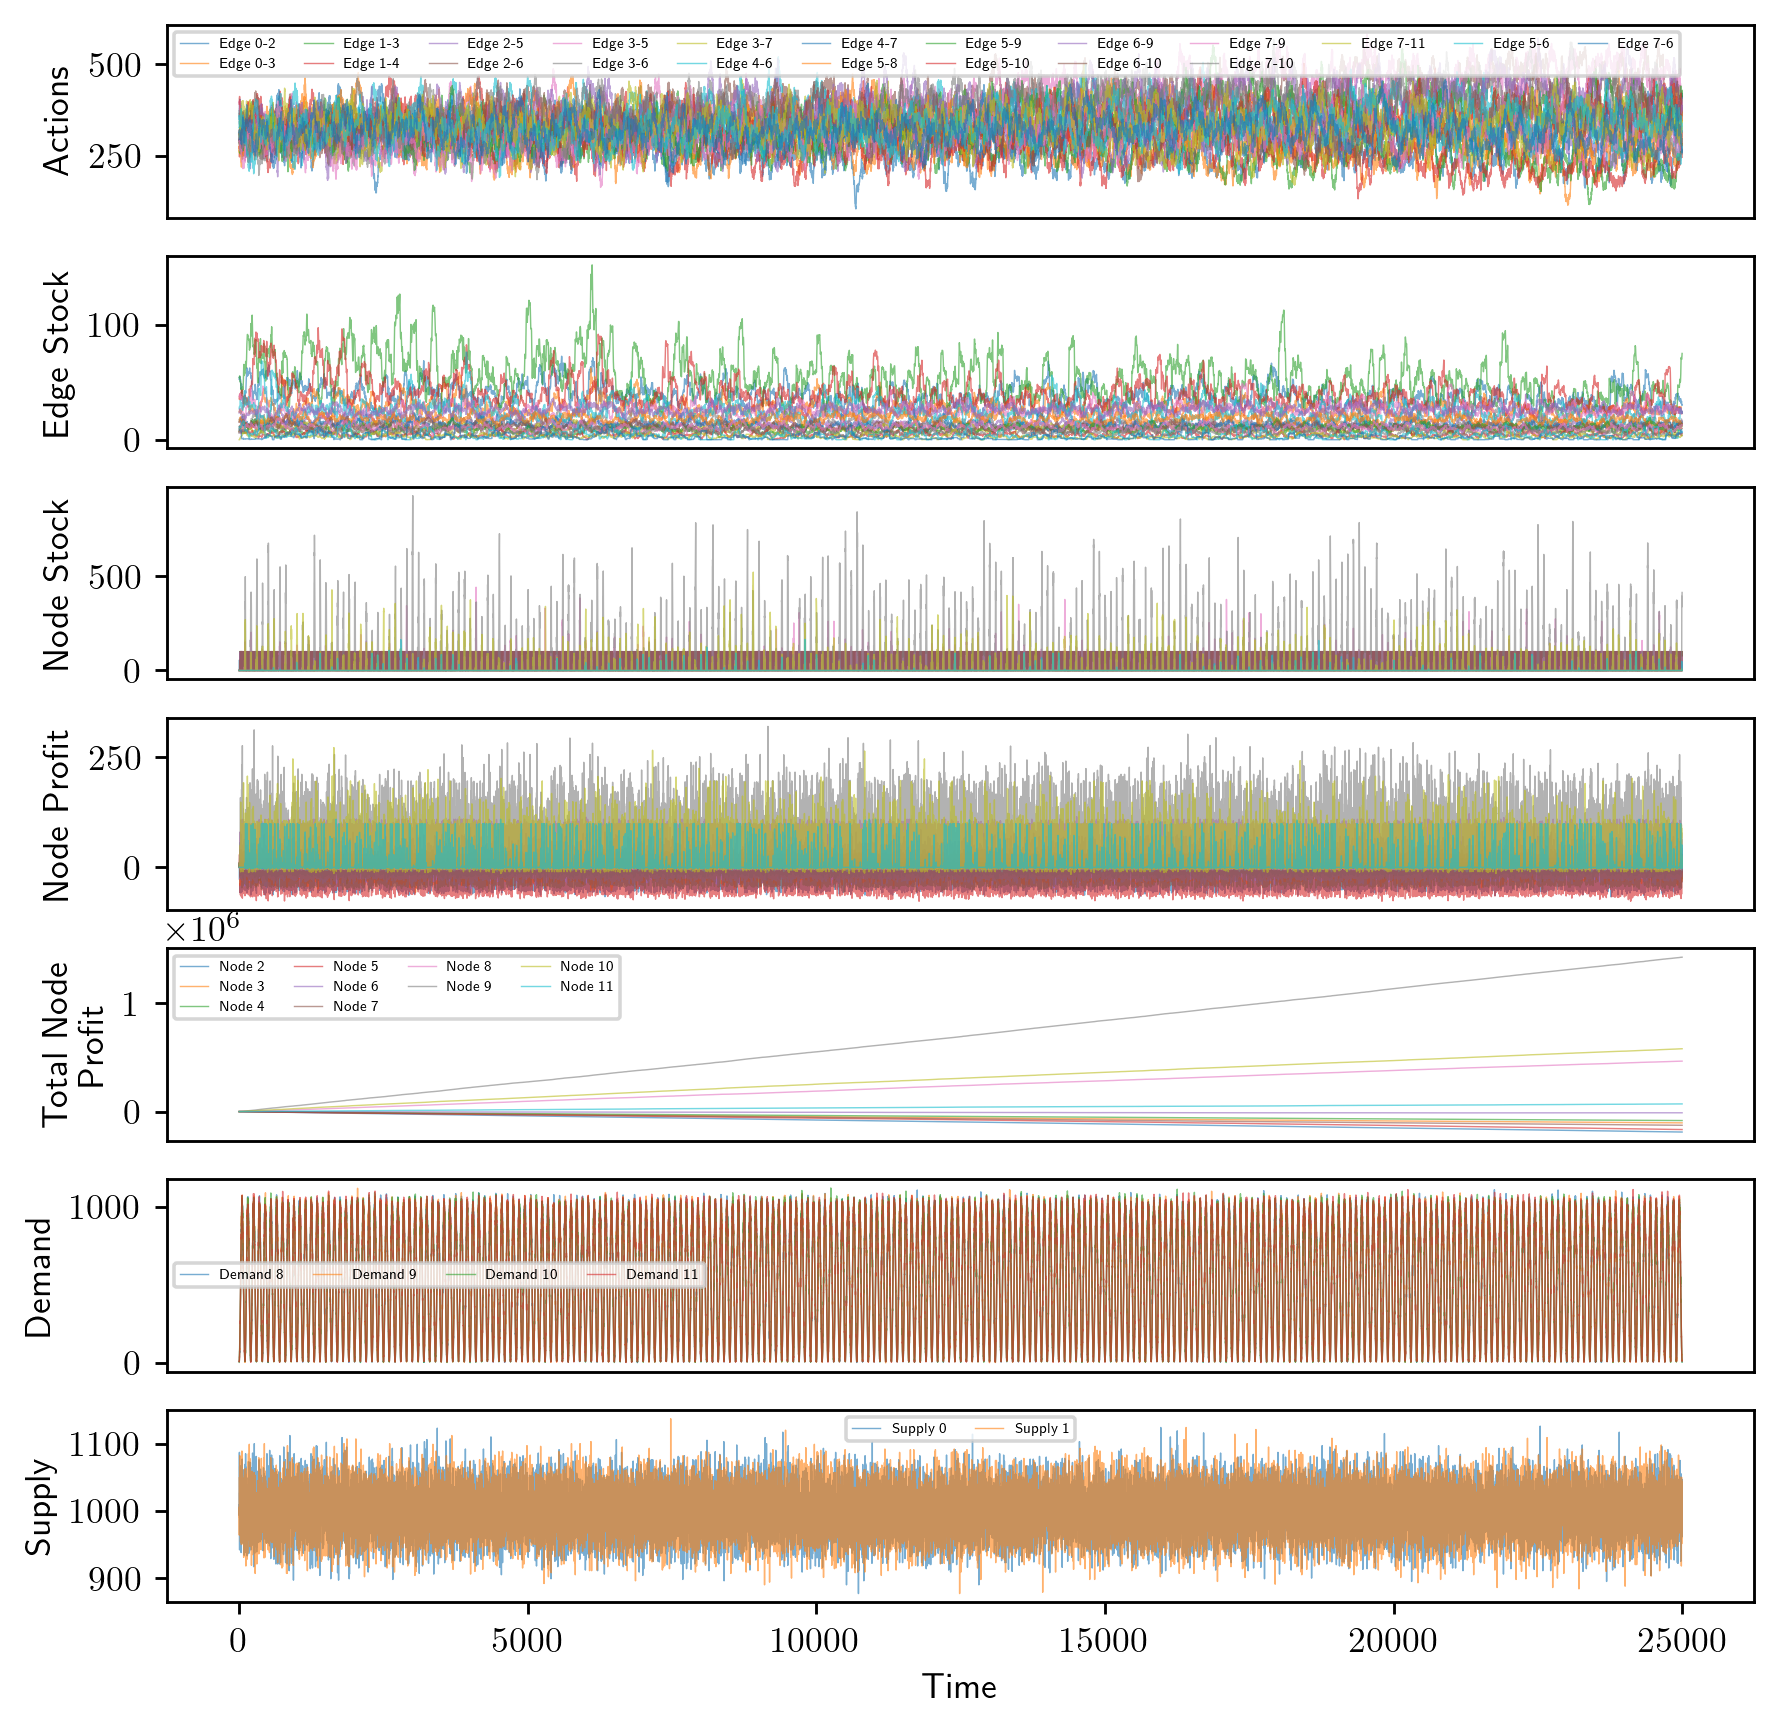

In [342]:
env.plot_history()